In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Ratio supervivencia

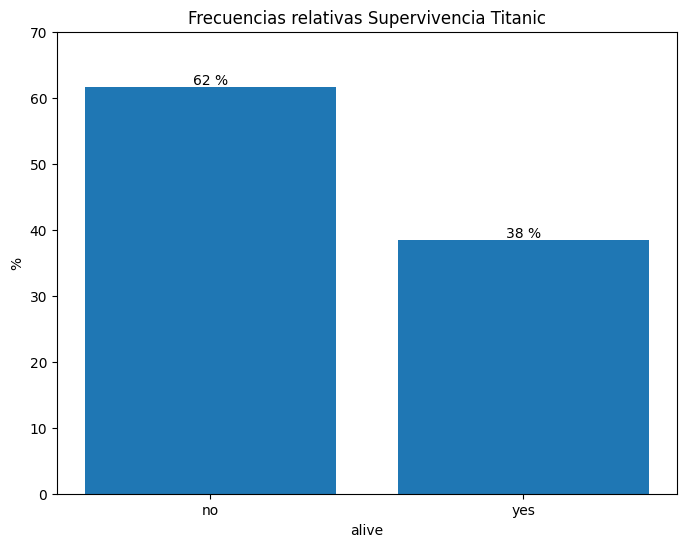

In [6]:
fig,axs = plt.subplots(nrows=1,ncols=1, figsize=(8,6))


valores = df_titanic.alive.value_counts(normalize=True)*100
sns.barplot(x= valores.index, y =  valores.values, hue=valores.index, legend=False, ax = axs, palette="tab10")

axs.set_title("Frecuencias relativas Supervivencia Titanic")
axs.set_ylabel("%")
axs.set_ylim(0,70)

bar_container = axs.bar(valores.index, valores.values)

axs.bar_label(bar_container, fmt="{:,.0f} %", label_type="edge")
axs.margins(y=0.1)


### FUNCIÓN Catplot_relative (con valor numérico sobre las columnas del gráfico)

In [8]:
def catplot_relative(df, cat_colx, cat_coly, titulo = None, tipo_grafico = "bar", list_coly_order = None):
  
    frecuencias_relativas = df.groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize = True)
    frecuencias_relativas["proportion"]*=100


    a = sns.catplot(x=cat_colx,
            y = "proportion",
            col=cat_coly,
            col_order= list_coly_order,                
            hue = cat_colx,
            hue_order=["no","yes"],
            kind= tipo_grafico,
            edgecolor=".6",
            palette= "hls",
            data= frecuencias_relativas,
            sharex="row")
    
    for ax in a.axes.ravel():
    
    # add annotations
        for c in ax.containers:
            # add custom labels with the labels=labels parameter if needed
            # labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
            ax.bar_label(c, fmt='{:,.0f} %', label_type='edge')
            ax.margins(y=0.2)

    a.set_axis_labels(cat_colx,"%")
    a.set_titles("{col_name}")

    a.fig.subplots_adjust(top=0.8)
    a.fig.suptitle(titulo)

    return

### Catplot_relative --> Alive & Sex

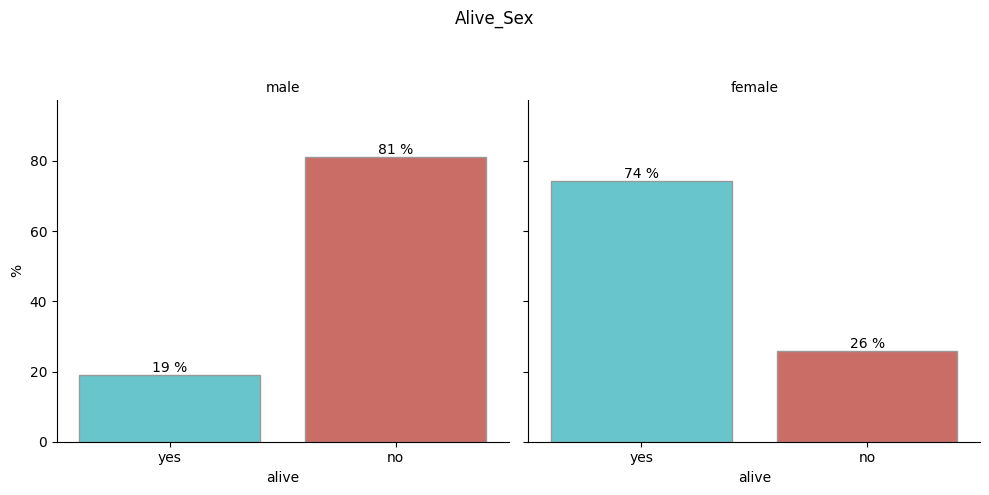

In [9]:
catplot_relative(df_titanic,"alive","sex", list_coly_order=["male","female"],titulo="Alive_Sex")

### Catplot_relative --> Alive & Class

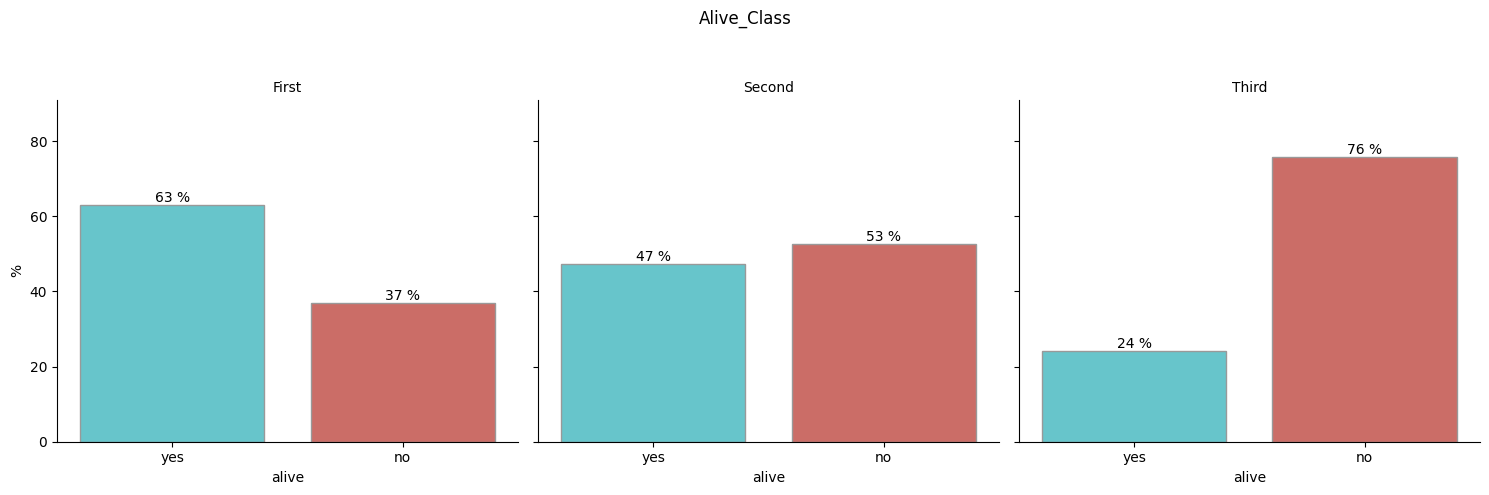

In [10]:
catplot_relative(df_titanic,"alive","class", list_coly_order=["First","Second","Third"],titulo="Alive_Class")

### Who & Class

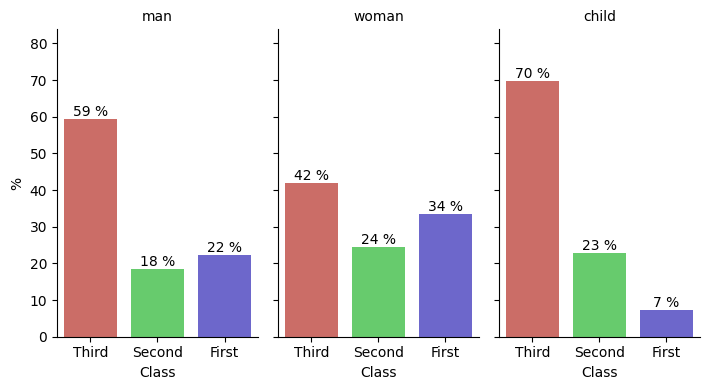

In [11]:
cat_colx = "class"
cat_coly = "who"
frecuencias_absolutas_1 = df_titanic.groupby(cat_coly, as_index = False)[cat_colx].value_counts()
frecuencias_relativas_1 = df_titanic.groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize = True)

frecuencias_relativas_1["proportion"]*=100

h= sns.catplot(data=frecuencias_relativas_1, 
                x="class",
                y = "proportion",
                col="who",
                kind="bar", height=4, aspect=.6, hue="class", col_order=["man","woman","child"], row_order=["First", "Second","Third"],
                palette= "hls"
)

for ax in h.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, fmt='{:,.0f} %', label_type='edge')
    ax.margins(y=0.2)

h.set_axis_labels("Class","%")
h.set_titles("{col_name}")

### Supervivencias segun clase y puerto de embarque

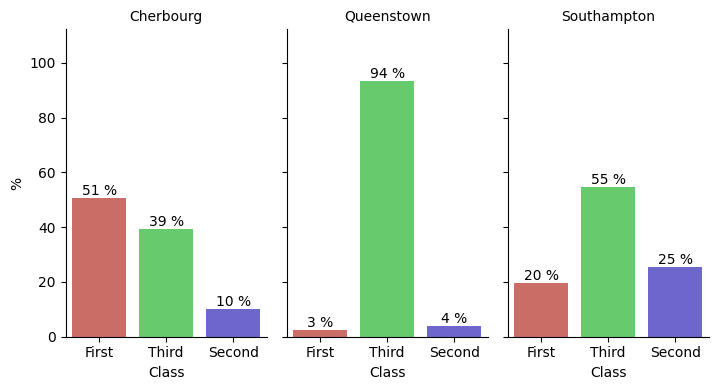

In [12]:
cat_colx = "class"
cat_coly = "embark_town"
frecuencias_absolutas_1 = df_titanic.groupby(cat_coly, as_index = False)[cat_colx].value_counts()
frecuencias_relativas_1 = df_titanic.groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize = True)

frecuencias_relativas_1["proportion"]*=100

u= sns.catplot(data=frecuencias_relativas_1, 
                x="class",
                y = "proportion",
                col="embark_town",
                kind="bar", height=4, aspect=.6, hue="class",
                palette= "hls"
)

for ax in u.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, fmt='{:,.0f} %', label_type='edge')
    ax.margins(y=0.2)

u.set_axis_labels("Class","%")
u.set_titles("{col_name}")

### Numero de pasajeros segun puerto

C:\Users\Luis\AppData\Local\Temp\ipykernel_9160\1423983212.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  t= sns.catplot(x="embark_town",


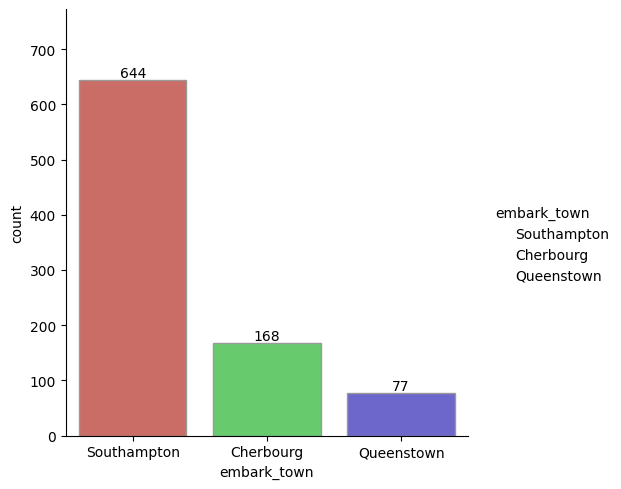

In [13]:
t= sns.catplot(x="embark_town",
            kind="count",
            edgecolor=".6",
            orient="V",
            data=df_titanic.sort_values("class"),palette= "hls");

for ax in t.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, fmt='{:,.0f}', label_type='edge')
    ax.margins(y=0.2)